<img src = "https://global-uploads.webflow.com/5f0d53c042a9ed6288de7f8d/5f6337ae2cfaa10946ceeb06_Hacktiv8%20logo%20horizontal%2001%20black-p-500.png" width = 400 >
<h1 align=center><font size = 5>Hacktiv8 Intermediate Python for Data Science</font></h1>

<h1 align=center><font size = 5>Final Project NLP</font></h1>

Klasifikasi level engagement (2 class) berdasarkan data open question survey dengan pertanyaan "(1) hal yang sudah baik dan (2) hal yang perlu dibenahi". Data diambil dari survey Telkom dengan responden sebanyak 5636 orang

# Import Data & Library

In [1]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("dataset/Results_EESCES 2020_20200914_small.csv",encoding='latin-1', header=4)
pd.set_option('display.max_columns', None) # Display all columns
df

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,Moderately Engaged,Moderately Engaged,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1983-09-29,37.0,2017-10-01,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Iya,Kurang setuju,Layanannya,40.00000

# Preprocessing & EDA

In [3]:
df = df.drop(df[df['Divisi'].isna()].index)
df

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,Moderately Engaged,Moderately Engaged,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1983-09-29,37.0,2017-10-01,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Iya,Kurang setuju,Layanannya,40.00000

In [4]:
# df['Open-Ended Response']
df.columns

Index(['Divisi', 'Company', 'BP', 'Level Company', 'CFU FU Outdated', 'CFU FU',
       'HCBP', 'Tahun Lahir', 'Umur', 'Mulai Kerja', 'Durasi Kerja',
       'Generasi', 'Jenis Kelamin', 'PSA', 'Pulau', 'Open-Ended Response',
       'Open-Ended Response.1', 'CES-RE135', 'Open-Ended Response.2',
       'Open-Ended Response.3', 'EES-DEI-Say', 'EES-DEI-Stay',
       'EES-DEI-Strive', 'EES-DWI-Agility', 'EES-DWI-EngagingLeadership',
       'EES-DWI-Talent Focus', 'EES-DWI-The Work', 'EES-DWI-The Basic',
       'EES-SB-Agility', 'EES-SB-Engaging Leadership', 'EES-SB-Talent Focus',
       'EES-SB-The Work', 'EES-SB-The Basic', 'EES-SB-Overall Satisfaction',
       'EES-Bobot-AG1', 'EES-Bobot-AG2', 'EES-Bobot-AG3', 'EES-Bobot-AG4',
       'EES-Bobot-AG5', 'EES-Bobot-EL1', 'EES-Bobot-EL2', 'EES-Bobot-TF1',
       'EES-Bobot-TF2', 'EES-Bobot-TF3', 'EES-Bobot-TF4', 'EES-Bobot-TF5',
       'EES-Bobot-TW1', 'EES-Bobot-TW2', 'EES-Bobot-TW3', 'EES-Bobot-TW4',
       'EES-Bobot-TB1', 'EES-Bobot-TB2', '

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 92 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Divisi                               5636 non-null   object 
 1   Company                              5630 non-null   object 
 2   BP                                   5636 non-null   object 
 3   Level Company                        5636 non-null   object 
 4   CFU FU Outdated                      5636 non-null   object 
 5   CFU FU                               5636 non-null   object 
 6   HCBP                                 5636 non-null   object 
 7   Tahun Lahir                          5636 non-null   object 
 8   Umur                                 5636 non-null   float64
 9   Mulai Kerja                          5636 non-null   object 
 10  Durasi Kerja                         5636 non-null   object 
 11  Generasi                      

In [6]:
# backup
full_df = df

In [7]:
# df[['Tahun Lahir', 'Mulai Kerja']]
# df = df.drop(df.columns[0:8], axis=1)

In [8]:
df = df.drop(['Tahun Lahir', 'Mulai Kerja'], axis=1)

In [9]:
df = df.drop(['CES-RE135'], axis=1)

In [10]:
# df = df.drop(df.columns[13:15], axis=1) #drop open ended response 1

In [11]:
df = df.drop(df.columns[17:64], axis=1) #drop open ended response 2

In [12]:
df = df.drop(df.columns[18:35], axis=1) #drop open ended response 2

In [13]:
df.head(5)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,41.0,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Over all sudah baik,Kemudahan menghubungi HC helpdesk,Highly Engaged,NaN,NaN,NaN,NaN,NaN,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,42.0,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,email blast,blasting information,Moderately Engaged,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,45.0,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Informasi yang disampaikan cukup jelas,Lebih update & cepat,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,37.0,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Kurang setuju,Layanannya,Disengaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,1.3 DIGITAL SERVICE,1. DIGITAL TECHNOLOGY
4,PT. TELKOMSEL,PT. TELKOMSEL,V,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,28.0,3,Junior Millennial,PRIA,Jakarta,Jawa,reward,tidak ada,Media Chat,Poster,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0


In [14]:
# Combine Open Question
df['open_question'] = "bagus "+df['Open-Ended Response'].fillna('')+". jelek "+df['Open-Ended Response.1'].fillna('')+"."

### Preprocessing String

In [15]:
import re
def preprocess(text):
    
    text = str(text).lower()
    text = re.sub(r'^<div id="video.*>&nbsp;', '', text) # Video-review part
    text = re.sub('https?://[A-Za-z0-9./]+', '', text) # URLs
    
    # Remove HTML Tag
    text = re.sub('<.*?>', '', text)    
    
    # Remove everything in bracket    
    text = re.sub('\[[^)]*\]', '', text)    
    
    text = re.sub('[/]+', ' ', text) # word1/word2 to word1 word2
    # Remove non-alphanumeric characters (but not - and _, might be useful for tokenization)
    text = re.sub('[^A-Za-z0-9-_ ]+', '', text)

    # Remove words that are digits only
    text = re.sub('\b\d+\b', '', text)                
    
    return text

In [16]:
df['open_question'] = df['open_question'].apply(preprocess)

In [17]:
df['open_question']

0       bagus fasilitas keamanan kenyamanan jelek keje...
1            bagus fasilitas kerja jelek reward dan bonus
2       bagus digitalisasi sistem  flexible time for w...
3       bagus kekeluargaan jelek remunerasi masih perl...
4                            bagus reward jelek tidak ada
                              ...                        
5631    bagus mekanisme pola kerja di masa pandemi sek...
5632         bagus lingkungan kerja jelek kejelasan karir
5633    bagus gaji fasilitas kerja faskes jelek ketega...
5634    bagus perusahaan sangat memperhatikan keselama...
5635    bagus budaya kerja jelek sistem performansi ya...
Name: open_question, Length: 5636, dtype: object

In [18]:
from IPython.display import display, clear_output
import time
from nltk.corpus import stopwords
from nltk.corpus import wordnet as wn
from nltk.tokenize import word_tokenize

len_df = len(df)
start = 0
# end   = 960205
t1 = time.time()
for entry in df['open_question']:    
    clear_output(wait=True)
    res = [word for word in word_tokenize(entry) if not word in stopwords.words('english') and not word in stopwords.words('indonesian')]
    res = (" ").join(res)  
    p = (start/len_df)*100
    display("%.7f" % p +" - "+str(start))
    df.loc[start,'clean_open_question'] = res
    if start >= len_df:
        break
    start = start+1
    
t2 = time.time()
print('Duration: {0:.2f}s'.format(round(t2-t1,2)))

'99.9822569 - 5635'

Duration: 219.29s


In [19]:
df.head(5)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family,open_question,clean_open_question
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,41.0,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Over all sudah baik,Kemudahan menghubungi HC helpdesk,Highly Engaged,NaN,NaN,NaN,NaN,NaN,0,0,bagus fasilitas keamanan kenyamanan jelek keje...,bagus fasilitas keamanan kenyamanan jelek keje...
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,42.0,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,email blast,blasting information,Moderately Engaged,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus fasilitas kerja jelek reward dan bonus,bagus fasilitas kerja jelek reward bonus
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,45.0,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Informasi yang disampaikan cukup jelas,Lebih update & cepat,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus digitalisasi sistem flexible time for w...,bagus digitalisasi sistem flexible time work j...
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,37.0,2,Senior Millennial,PRIA,Jakarta,Jawa,Kekeluargaan,Remunerasi masih perlu dipertanyakan,Kurang setuju,Layanannya,Disengaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,1.3 DIGITAL SERVICE,1. DIGITAL TECHNOLOGY,bagus kekeluargaan jelek remunerasi masih perl...,bagus kekeluargaan jelek remunerasi
4,PT. TELKOMSEL,PT. TELKOMSEL,V,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,28.0,3,Junior Millennial,PRIA,Jakarta,Jawa,reward,tidak ada,Media Chat,Poster,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus reward jelek tidak ada,bagus reward jelek


In [20]:
df[['Open-Ended Response','Open-Ended Response.1','open_question','clean_open_question']][:10]

,Open-Ended Response,Open-Ended Response.1,open_question,clean_open_question
0,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,bagus fasilitas keamanan kenyamanan jelek keje...,bagus fasilitas keamanan kenyamanan jelek keje...
1,Fasilitas kerja,Reward dan Bonus,bagus fasilitas kerja jelek reward dan bonus,bagus fasilitas kerja jelek reward bonus
2,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",bagus digitalisasi sistem flexible time for w...,bagus digitalisasi sistem flexible time work j...
3,Kekeluargaan,Remunerasi masih perlu dipertanyakan,bagus kekeluargaan jelek remunerasi masih perl...,bagus kekeluargaan jelek remunerasi
4,reward,tidak ada,bagus reward jelek tidak ada,bagus reward jelek
5,Bos saya sudah bisa Excel dan mengerjakan repo...,Pimpinan kurang mendengarkan aspirasi karyawan.,bagus bos saya sudah bisa excel dan mengerjaka...,bagus bos excel report bulanan jelek pimpinan ...
6,-,-,bagus - jelek -,bagus - jelek -
7,nurturing people,remunerasi / benefit untuk karyawan misalnya s...,bagus nurturing people jelek remunerasi bene...,bagus nurturing people jelek remunerasi benefi...
8,"Fasilitas, remunerasi",-,bagus fasilitas remunerasi jelek -,bagus fasilitas remunerasi jelek -
9,visi misi perusahaan,"Talent, apresiasi terhadap kinerja karyawan, p...",bagus visi misi perusahaan jelek talent apresi...,bagus visi misi perusahaan jelek talent apresi...


In [21]:
df.isna().sum()

Divisi                     0
Company                    6
BP                         0
Level Company              0
CFU FU Outdated            0
CFU FU                     0
HCBP                       0
Umur                       0
Durasi Kerja               0
Generasi                   0
Jenis Kelamin              0
PSA                        0
Pulau                      0
Open-Ended Response        3
Open-Ended Response.1      3
Open-Ended Response.2      3
Open-Ended Response.3      3
Level Engagement 2         0
Agama                    276
Marital                  277
Employee Group           271
Employee Subgroup        271
Level Pendidikan         271
Short Job Function         0
Short Job Family           0
open_question              0
clean_open_question        0
dtype: int64

In [22]:
df['Level Engagement 2'].value_counts()

Highly Engaged        3170
Moderately Engaged    2316
Disengaged             150
Name: Level Engagement 2, dtype: int64

<AxesSubplot:>

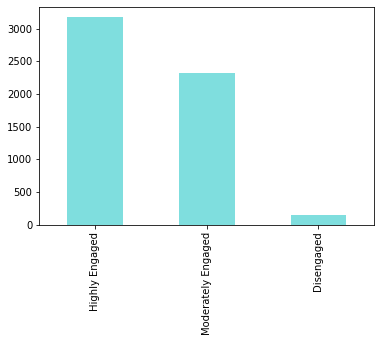

In [23]:
df['Level Engagement 2'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

# Class Imbalance

In [24]:
df = df.drop(df[df['Level Engagement 2']=='Disengaged'].index)

<AxesSubplot:>

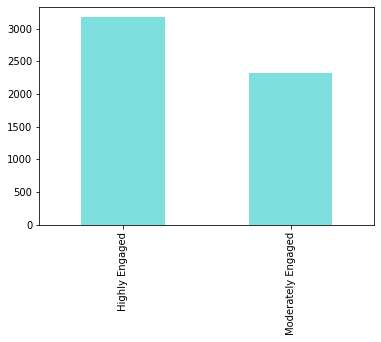

In [25]:
df['Level Engagement 2'].value_counts().plot(
                        kind='bar',
                        alpha=0.5,                         
                        color='c'
                        )

In [26]:
# Balance Class
sample_size = 2316 # needs to be less than the number of observations in the minority class
sample_df = df.groupby('Level Engagement 2').apply(lambda x: x.sample(sample_size))

In [27]:
sample_df = sample_df.reset_index(level=0, drop=True)

In [28]:
sample_df = sample_df.sort_index()

In [29]:
sample_df.groupby("Level Engagement 2").size()

Level Engagement 2
Highly Engaged        2316
Moderately Engaged    2316
dtype: int64

In [30]:
sample_df['word_count'] = sample_df['clean_open_question'].str.split().str.len()

In [31]:
result = [x for x in sample_df['word_count']]
print("Mean : {}".format(np.mean(result)))
print("Max  : {}".format(sample_df['word_count'].max()))
print("Min  : {}".format(sample_df['word_count'].min()))

Mean : 13.7353195164076
Max  : 171
Min  : 2


In [32]:
sample_df[sample_df['word_count']<=2]

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,Open-Ended Response.2,Open-Ended Response.3,Level Engagement 2,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family,open_question,clean_open_question,word_count
197,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,VI,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,29.0,3,Senior Millennial,PRIA,Jakarta,Jawa,sudah baik,sudah baik,semua sudah baik,semua sudah baik,Highly Engaged,Hindu,single,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus sudah baik jelek sudah baik,bagus jelek,2
674,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,VI,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,30.0,4,Senior Millennial,PRIA,Jakarta,Jawa,.,.,.,.,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus jelek,bagus jelek,2
1633,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,VI,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,24.0,5,Junior Millennial,PRIA,Jakarta,Jawa,.,.,.,.,Highly Engaged,islam,single,Karyawan Tetap,Aktif Normal,SMU,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus jelek,bagus jelek,2
1808,PT. TELKOMEDIKA,PT. TELKOMEDIKA,VI,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,32.0,7,Senior Millennial,WANITA,Malang,Jawa,.............,................,"Sudah baik, namun perlu ditingkatkan lagi",PEnyampaian yang lebih komunikatif dan timbal ...,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,3.6 GENERAL AFFAIRS & SUPPORT,3. CORPORATE ENABLERS,bagus jelek,bagus jelek,2
2168,PT. TELKOM AKSES,PT. TELKOM AKSES,II,AP,FU-DIGITAL BUSINESS,CFU-CONSUMER,HCBP 1,50.0,21,Gen X,PRIA,Jakarta,Jawa,.,.,.,.,Highly Engaged,Protestan,menikah,Karyawan Tetap,Employee Mobility,S1,1.1 DIGITAL CONNECTIVITY,1. DIGITAL TECHNOLOGY,bagus jelek,bagus jelek,2
2179,PT. TELKOMSEL,PT. TELKOMSEL,III,AP,FU-DIGITAL BUSINESS,CFU-MOBILE,HCBP 1,34.0,11,Senior Millennial,PRIA,Jakarta,Jawa,Baik,Baik,Baik,baik,Moderately Engaged,Hindu,menikah,Karyawan Tetap,Aktif Normal,S1,0,0,bagus baik jelek baik,bagus jelek,2
2352,PT. ADMEDIKA,PT. ADMEDIKA,VII,AP,FU-DIGITAL BUSINESS,CFU-ENTERPRISE,HCBP 2,28.0,6,Junior Millennial,WANITA,JKT0,Jawa,Tidak ada,tidak ada,Tidak ada,tidak ada,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,D3,3.4 HUMAN CAPITAL,3. CORPORATE ENABLERS,bagus tidak ada jelek tidak ada,bagus jelek,2
2411,PT. MELON INDONESIA,PT. MELON INDONESIA,IV,AP,FU-DIGITAL BUSINESS,FU-DIGITAL BUSINESS,HCBP 4,30.0,3,Senior Millennial,PRIA,BANDUNG,Jawa,Secara umum baik,Tidak ada,Sudah baik,Tidak ada,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,0,1. DIGITAL TECHNOLOGY,bagus secara umum baik jelek tidak ada,bagus jelek,2
2454,DIVISI TELKOM REGIONAL IV,"PT. TELEKOMUNIKASI INDONESIA,TBK",VI,Telkom,FU-DIGITAL BUSINESS,CFU-CONSUMER,HCBP 1,25.0,1,Junior Millennial,WANITA,Semarang,Jawa,sudah baik,sudah baik,baik,baik,Moderately Engaged,islam,single,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY,bagus sudah baik jelek sudah baik,bagus jelek,2
2461,INTERNAL AUDIT,"PT. TELEKOMUNIKASI INDONESIA,TBK",IV,Telkom,FU-DIGITAL BUSINESS,CEO'S OFFICE,HCBP 5,32.0,7,Senior Millennial,WANITA,Bandung,Jawa,/,â,-,-,Moderately Engaged,islam,menikah,Karyawan Tetap,Aktif Normal,S1,"3.2 CORP AFFAIRS,REGULATION & COMPLIANCE",3. CORPORATE ENABLERS,bagus jelek,bagus jelek,2


In [33]:
X = sample_df['clean_open_question'].values
y = sample_df['Level Engagement 2'].values

# Train Test Split

In [34]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22) #, test_size=0.1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22) #, test_size=0.1

In [35]:
print(X_train[100])
print(y_test[100])

bagus pertahankan solid tan unit bahu membahu tuk pencapain target yg ditetapkan perusahaan jelek bersinergi dg unit kerja mencapai tujuan yg ditetap perusahaan
Highly Engaged


In [36]:
# Convert all word to string
X_train = [str (item) for item in X_train]
X_valid = [str (item) for item in X_valid]
X_test = [str (item) for item in X_test]

# Tokenize Words

In [37]:
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence

MAX_FEATURES = 250
tokenizer = Tokenizer(num_words=MAX_FEATURES)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_valid = tokenizer.texts_to_sequences(X_valid)
X_test = tokenizer.texts_to_sequences(X_test)

In [38]:
print(X_train[100])

[1, 107, 8, 48, 6, 5, 2, 91, 8, 4, 127, 120, 6, 5]


In [39]:
tokenizer.word_index['kenyamanan']

111

In [40]:
from sklearn.preprocessing import LabelEncoder

# Encode Label
Encoder = LabelEncoder()
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)
y_test = Encoder.fit_transform(y_test)

In [41]:
y_train

array([0, 0, 1, ..., 0, 1, 0])

# Padding

In [42]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

MAX_LENGTH = max(len(X_train) for X_train in X_train)
print(MAX_LENGTH)
X_train = pad_sequences(X_train, maxlen=MAX_LENGTH)
X_valid = pad_sequences(X_valid, maxlen=MAX_LENGTH)
X_test = pad_sequences(X_test, maxlen=MAX_LENGTH)

61


In [43]:
print(X_train[1])

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1   5
  85 166   6   2  25  36   8]


# Build Model 1

In [44]:
import tensorflow as tf
from tensorflow import keras

model = tf.keras.models.Sequential()

model.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.60
    )
)

model.add(
    tf.keras.layers.LSTM(
        units=32 #32 8
    )
)

model.add(
    tf.keras.layers.Dropout(
        rate=0.60
    )
)

model.add(
    tf.keras.layers.Dense(
        units=1,
        activation='sigmoid'
    )
)

In [45]:
model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 61, 32)            8000      
_________________________________________________________________
dropout (Dropout)            (None, 61, 32)            0         
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dropout_1 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 16,353
Trainable params: 16,353
Non-trainable params: 0
_________________________________________________________________


In [46]:
history = model.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
11/11 [==============================] - 22s 347ms/step - loss: 0.6932 - accuracy: 0.5119 - val_loss: 0.6931 - val_accuracy: 0.4994
Epoch 2/150
11/11 [==============================] - 0s 38ms/step - loss: 0.6922 - accuracy: 0.5381 - val_loss: 0.6914 - val_accuracy: 0.5409
Epoch 3/150
11/11 [==============================] - 0s 42ms/step - loss: 0.6914 - accuracy: 0.5261 - val_loss: 0.6908 - val_accuracy: 0.5362
Epoch 4/150
11/11 [==============================] - 0s 42ms/step - loss: 0.6901 - accuracy: 0.5523 - val_loss: 0.6900 - val_accuracy: 0.5558
Epoch 5/150
11/11 [==============================] - 0s 39ms/step - loss: 0.6892 - accuracy: 0.5430 - val_loss: 0.6887 - val_accuracy: 0.5685
Epoch 6/150
11/11 [==============================] - 0s 41ms/step - loss: 0.6862 - accuracy: 0.5690 - val_loss: 0.6876 - val_accuracy: 0.5397
Epoch 7/150
11/11 [==============================] - 0s 40ms/step - loss: 0.6827 - accuracy: 0.5822 - val_loss: 0.6865 - val_accuracy: 0.5558
Epoc

Epoch 115/150
11/11 [==============================] - 0s 41ms/step - loss: 0.5581 - accuracy: 0.6949 - val_loss: 0.7992 - val_accuracy: 0.5823
Epoch 116/150
11/11 [==============================] - 0s 39ms/step - loss: 0.5449 - accuracy: 0.7022 - val_loss: 0.8033 - val_accuracy: 0.5765
Epoch 117/150
11/11 [==============================] - 0s 39ms/step - loss: 0.5404 - accuracy: 0.7114 - val_loss: 0.8060 - val_accuracy: 0.5800
Epoch 118/150
11/11 [==============================] - 0s 40ms/step - loss: 0.5362 - accuracy: 0.7103 - val_loss: 0.8213 - val_accuracy: 0.5857
Epoch 119/150
11/11 [==============================] - 0s 38ms/step - loss: 0.5634 - accuracy: 0.6981 - val_loss: 0.8227 - val_accuracy: 0.5823
Epoch 120/150
11/11 [==============================] - 0s 40ms/step - loss: 0.5517 - accuracy: 0.7028 - val_loss: 0.7991 - val_accuracy: 0.5719
Epoch 121/150
11/11 [==============================] - 0s 38ms/step - loss: 0.5494 - accuracy: 0.7081 - val_loss: 0.8030 - val_accuracy:

In [47]:
model.evaluate(X_test, y_test)

37/37 [==============================] - 0s 10ms/step - loss: 0.8423 - accuracy: 0.5622


[0.8423004150390625, 0.5621761679649353]

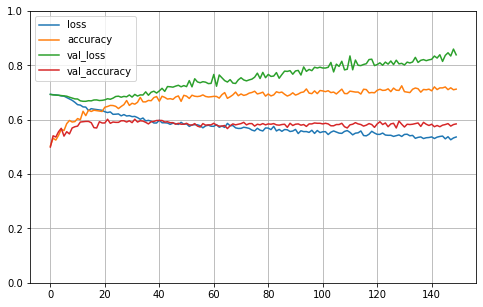

In [48]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Build Model 2: Categorical Crossentropy

In [49]:
y_train = tf.keras.utils.to_categorical(y_train, 2, dtype="float32")
y_valid = tf.keras.utils.to_categorical(y_valid, 2, dtype="float32")
y_test = tf.keras.utils.to_categorical(y_test, 2, dtype="float32")

In [50]:
print(X_train.shape)
print(y_train.shape)

(2605, 61)
(2605, 2)


In [51]:
# Model 2: Categorical_crossentropy

model2 = tf.keras.models.Sequential()

model2.add(
    tf.keras.layers.Embedding(
        input_dim = MAX_FEATURES,
        output_dim = 32,
        input_length = MAX_LENGTH
    )
)

model2.add(tf.keras.layers.LSTM(units=32, dropout=0.5))

model2.add(tf.keras.layers.Dense(2, activation='softmax'))

In [52]:
model2.compile(optimizer='adam',loss='categorical_crossentropy', metrics=['accuracy'])

model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 61, 32)            8000      
_________________________________________________________________
lstm_1 (LSTM)                (None, 32)                8320      
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 66        
Total params: 16,386
Trainable params: 16,386
Non-trainable params: 0
_________________________________________________________________


## Train Model 2

In [53]:
# history 2
history2 = model2.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
11/11 [==============================] - 6s 155ms/step - loss: 0.6936 - accuracy: 0.4884 - val_loss: 0.6927 - val_accuracy: 0.5144
Epoch 2/150
11/11 [==============================] - 0s 38ms/step - loss: 0.6916 - accuracy: 0.5422 - val_loss: 0.6906 - val_accuracy: 0.5478
Epoch 3/150
11/11 [==============================] - 0s 38ms/step - loss: 0.6894 - accuracy: 0.5552 - val_loss: 0.6891 - val_accuracy: 0.5581
Epoch 4/150
11/11 [==============================] - 0s 38ms/step - loss: 0.6865 - accuracy: 0.5628 - val_loss: 0.6862 - val_accuracy: 0.5662
Epoch 5/150
11/11 [==============================] - 0s 37ms/step - loss: 0.6818 - accuracy: 0.5741 - val_loss: 0.6834 - val_accuracy: 0.5627
Epoch 6/150
11/11 [==============================] - 0s 37ms/step - loss: 0.6748 - accuracy: 0.5861 - val_loss: 0.6803 - val_accuracy: 0.5558
Epoch 7/150
11/11 [==============================] - 0s 36ms/step - loss: 0.6634 - accuracy: 0.6017 - val_loss: 0.6758 - val_accuracy: 0.5800
Epoch

11/11 [==============================] - 0s 37ms/step - loss: 0.4987 - accuracy: 0.7445 - val_loss: 0.8990 - val_accuracy: 0.5662
Epoch 116/150
11/11 [==============================] - 0s 38ms/step - loss: 0.5075 - accuracy: 0.7420 - val_loss: 0.9039 - val_accuracy: 0.5639
Epoch 117/150
11/11 [==============================] - 0s 36ms/step - loss: 0.5039 - accuracy: 0.7310 - val_loss: 0.8913 - val_accuracy: 0.5673
Epoch 118/150
11/11 [==============================] - 0s 38ms/step - loss: 0.5014 - accuracy: 0.7391 - val_loss: 0.9277 - val_accuracy: 0.5708
Epoch 119/150
11/11 [==============================] - 0s 37ms/step - loss: 0.4923 - accuracy: 0.7356 - val_loss: 0.8887 - val_accuracy: 0.5662
Epoch 120/150
11/11 [==============================] - 0s 39ms/step - loss: 0.5025 - accuracy: 0.7404 - val_loss: 0.9173 - val_accuracy: 0.5719
Epoch 121/150
11/11 [==============================] - 0s 38ms/step - loss: 0.4905 - accuracy: 0.7543 - val_loss: 0.9090 - val_accuracy: 0.5662
Epoch 

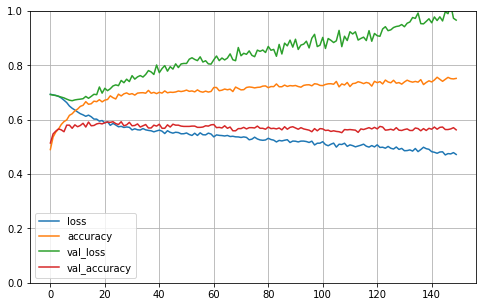

In [54]:
# Model 2

pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

## Evaluate Model 2

In [55]:
model2.evaluate(X_test, y_test)

37/37 [==============================] - 0s 10ms/step - loss: 0.9526 - accuracy: 0.5423


[0.9525831937789917, 0.542314350605011]

In [68]:
from sklearn.metrics import confusion_matrix


X_new = X_test
y_pred = model2.predict(X_test)

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test.argmax(axis=1), np.argmax(y_pred, axis=1))
print(cm)


[[296 308]
 [222 332]]


# Build Model 3: RNN

In [251]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22) #, test_size=0.1
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22) #, test_size=0.1

In [252]:
VOCAB_SIZE = 1000
encoder = tf.keras.layers.experimental.preprocessing.TextVectorization(
    max_tokens=MAX_FEATURES,
    output_mode='int',
    output_sequence_length=MAX_LENGTH)

encoder.adapt(X_train)

In [253]:
encoder.get_vocabulary()

['',
 '[UNK]',
 'bagus',
 'jelek',
 'karyawan',
 'kerja',
 'perusahaan',
 'yg',
 'fasilitas',
 'unit',
 'kesehatan',
 'karir',
 'lingkungan',
 'pekerjaan',
 'sesuai',
 'sistem',
 'kesejahteraan',
 'proses',
 'work',
 'talent',
 'management',
 'bisnis',
 'kondisi',
 'telkom',
 'komunikasi',
 'digital',
 'koordinasi',
 'pengembangan',
 'mendukung',
 'balance',
 'sdh',
 'kinerja',
 'reward',
 'budaya',
 '1',
 'pengelolaan',
 'kerjasama',
 'sdm',
 'atasan',
 'utk',
 'terkait',
 '2',
 'pandemi',
 'kebutuhan',
 'ditingkatkan',
 'life',
 'visi',
 'jenjang',
 'target',
 'remunerasi',
 'manajemen',
 'kebijakan',
 'sarana',
 'kesempatan',
 'pelanggan',
 'nyaman',
 'gaji',
 'produk',
 'pegawai',
 'kantor',
 'performansi',
 'jam',
 'job',
 'keselamatan',
 'team',
 'customer',
 'suasana',
 'pola',
 'benefit',
 'wfh',
 'support',
 'posisi',
 'level',
 'tim',
 'misi',
 'penilaian',
 'pensiun',
 'maksimal',
 'organisasi',
 'kompetensi',
 'memadai',
 'informasi',
 'birokrasi',
 'dibenahi',
 'memperhati

In [254]:
y_train = Encoder.fit_transform(y_train)
y_valid = Encoder.fit_transform(y_valid)
y_test = Encoder.fit_transform(y_test)

In [255]:
type(X_train)

numpy.ndarray

In [256]:
len(encoder.get_vocabulary())

250

In [258]:
model3 = tf.keras.Sequential([
    encoder,
    tf.keras.layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(64,  return_sequences=True)),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32)),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1)
])

In [259]:
model3.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])

In [260]:
history3 = model3.fit(X_train, y_train, batch_size=256, epochs=150, validation_data=(X_valid, y_valid))

Epoch 1/150
11/11 [==============================] - 66s 2s/step - loss: 0.6931 - accuracy: 0.4987 - val_loss: 0.6931 - val_accuracy: 0.4741
Epoch 2/150
11/11 [==============================] - 2s 164ms/step - loss: 0.6930 - accuracy: 0.4917 - val_loss: 0.6930 - val_accuracy: 0.4741
Epoch 3/150
11/11 [==============================] - 2s 153ms/step - loss: 0.6929 - accuracy: 0.5029 - val_loss: 0.6930 - val_accuracy: 0.4741
Epoch 4/150
11/11 [==============================] - 2s 156ms/step - loss: 0.6928 - accuracy: 0.4949 - val_loss: 0.6929 - val_accuracy: 0.4741
Epoch 5/150
11/11 [==============================] - 2s 162ms/step - loss: 0.6926 - accuracy: 0.5076 - val_loss: 0.6927 - val_accuracy: 0.4741
Epoch 6/150
11/11 [==============================] - 2s 154ms/step - loss: 0.6925 - accuracy: 0.4850 - val_loss: 0.6924 - val_accuracy: 0.4741
Epoch 7/150
11/11 [==============================] - 2s 155ms/step - loss: 0.6919 - accuracy: 0.5026 - val_loss: 0.6923 - val_accuracy: 0.4741
E

Epoch 58/150
11/11 [==============================] - 2s 151ms/step - loss: 0.5749 - accuracy: 0.6644 - val_loss: 0.7401 - val_accuracy: 0.5489
Epoch 59/150
11/11 [==============================] - 2s 150ms/step - loss: 0.5724 - accuracy: 0.6638 - val_loss: 0.7410 - val_accuracy: 0.5432
Epoch 60/150
11/11 [==============================] - 2s 156ms/step - loss: 0.5682 - accuracy: 0.6708 - val_loss: 0.7408 - val_accuracy: 0.5455
Epoch 61/150
11/11 [==============================] - 2s 154ms/step - loss: 0.5684 - accuracy: 0.6794 - val_loss: 0.7486 - val_accuracy: 0.5547
Epoch 62/150
11/11 [==============================] - 2s 158ms/step - loss: 0.5846 - accuracy: 0.6435 - val_loss: 0.7320 - val_accuracy: 0.5409
Epoch 63/150
11/11 [==============================] - 2s 152ms/step - loss: 0.5700 - accuracy: 0.6770 - val_loss: 0.7309 - val_accuracy: 0.5466
Epoch 64/150
11/11 [==============================] - 2s 151ms/step - loss: 0.5718 - accuracy: 0.6813 - val_loss: 0.7371 - val_accuracy:

Epoch 115/150
11/11 [==============================] - 2s 152ms/step - loss: 0.5059 - accuracy: 0.7381 - val_loss: 0.8830 - val_accuracy: 0.5581
Epoch 116/150
11/11 [==============================] - 2s 153ms/step - loss: 0.5092 - accuracy: 0.7404 - val_loss: 0.8621 - val_accuracy: 0.5558
Epoch 117/150
11/11 [==============================] - 2s 154ms/step - loss: 0.5043 - accuracy: 0.7379 - val_loss: 0.8641 - val_accuracy: 0.5466
Epoch 118/150
11/11 [==============================] - 2s 153ms/step - loss: 0.5197 - accuracy: 0.7209 - val_loss: 0.8743 - val_accuracy: 0.5604
Epoch 119/150
11/11 [==============================] - 2s 149ms/step - loss: 0.4995 - accuracy: 0.7465 - val_loss: 0.8805 - val_accuracy: 0.5616
Epoch 120/150
11/11 [==============================] - 2s 152ms/step - loss: 0.5136 - accuracy: 0.7223 - val_loss: 0.8877 - val_accuracy: 0.5593
Epoch 121/150
11/11 [==============================] - 2s 149ms/step - loss: 0.4871 - accuracy: 0.7577 - val_loss: 0.8982 - val_ac

In [261]:
model3.evaluate(X_test, y_test)

37/37 [==============================] - 1s 32ms/step - loss: 1.0058 - accuracy: 0.5475


[1.0057573318481445, 0.5474956631660461]

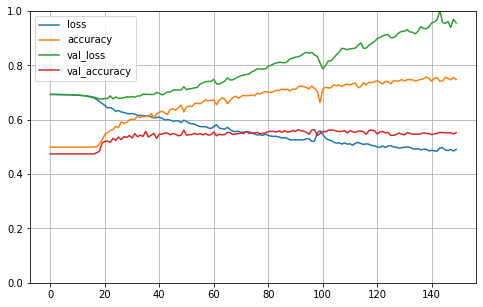

In [262]:
# Model 1
import matplotlib.pyplot as plt

pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

# Summary

Model 1 LSTM dengan Binary Crossentropy diperoleh akurasi 54.75%, namun loss masih sangat tinggi (84.23%), Model 2 LSTM-categorical crossentropy diperoleh 54.23%, namun loss masih sangat tinggi (95.26%) dan Model 3 2-Stack RNN diperoleh akurasi 54.75%, namun loss juga masih sangat tinggi (100%).

Ketiga model tergolong overfit, akurasi rendah dan loss tinggi sehingga belum ditemukan model terbaik untuk case ini, hal ini bisa disebabkan oleh data open question yang digunakan tidak relevan dengan target class.